## Please use the Seoul Bike dataset. 

- What are the factors that influence the number of bikes rented? 
- Explore the data for outliers and missing values.
- Plot the correlation between the variables and state your comments
- Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables.
- Coment on Model performance by using approapriate diagnostics and measures.

Good Luck!

In [1]:
import pandas as pd
import numpy as np
import math
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
sbdata= pd.read_csv("SeoulBikeData.csv")

sbdata.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [3]:
sbdata.info()

#there are no missing rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

## What are the factors that influence the number of bikes rented?

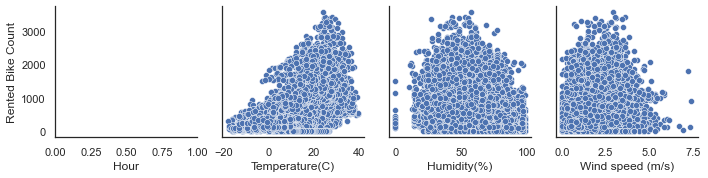

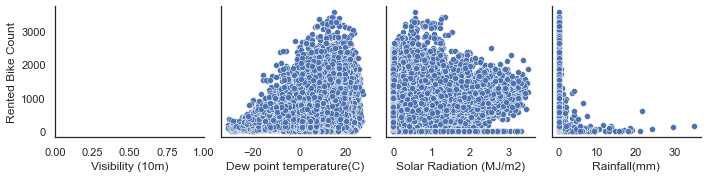

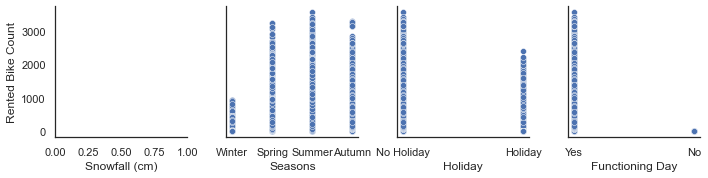

In [4]:
for s in range(2, 14, 4):
    sns.pairplot(data=sbdata,
                x_vars=sbdata.columns[s:s+4],
                y_vars=['Rented Bike Count'])

In [5]:
c=sbdata.columns.values
print('There is {} fators that affect bike rentals and they are: \n{}'.format(len(c[3:14]),c[3:14]))

There is 11 fators that affect bike rentals and they are: 
['Temperature(C)' 'Humidity(%)' 'Wind speed (m/s)' 'Visibility (10m)'
 'Dew point temperature(C)' 'Solar Radiation (MJ/m2)' 'Rainfall(mm)'
 'Snowfall (cm)' 'Seasons' 'Holiday' 'Functioning Day']


## Explore the data for outliers and missing values 

In [6]:
#when we used sbdata.info() we didnt see any missing values, all rows are there.

#we will explore outliers

(array([0, 1]), [Text(0, 0, 'Yes'), Text(1, 0, 'No')])

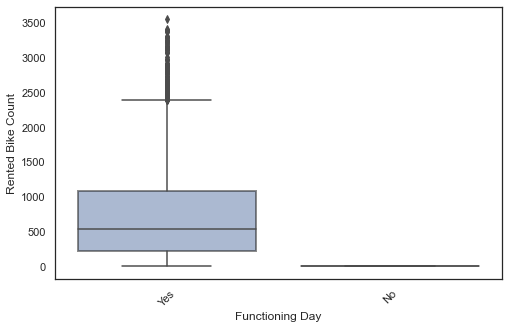

In [7]:
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Functioning Day', y='Rented Bike Count', data=sbdata)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#we can conclude that functioning days determine weather the store will be renting bikes or not
#otherwise, it has no importanc other than it is open for service or not.

(array([0, 1]), [Text(0, 0, 'No Holiday'), Text(1, 0, 'Holiday')])

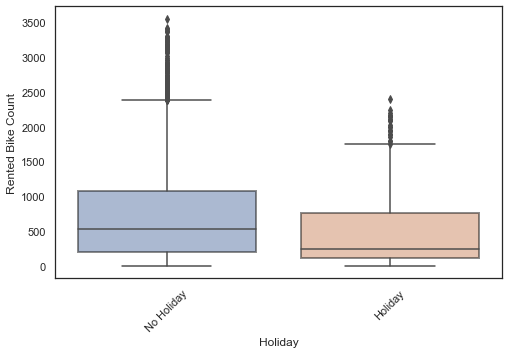

In [8]:
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Holiday', y='Rented Bike Count', data=sbdata)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#what we gt from here is that majority of people bike when there arent holidays but this isn't a huge factor.

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Winter'),
  Text(1, 0, 'Spring'),
  Text(2, 0, 'Summer'),
  Text(3, 0, 'Autumn')])

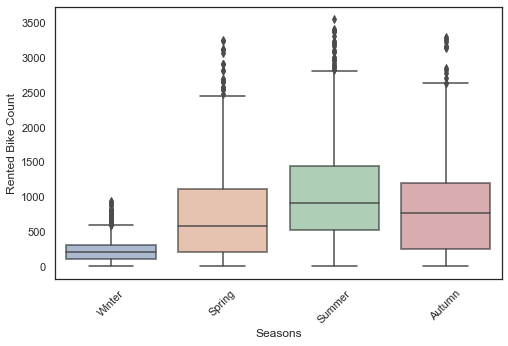

In [9]:
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Seasons', y='Rented Bike Count', data=sbdata)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

#majority of people bike in the summer but hardly in the winter. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

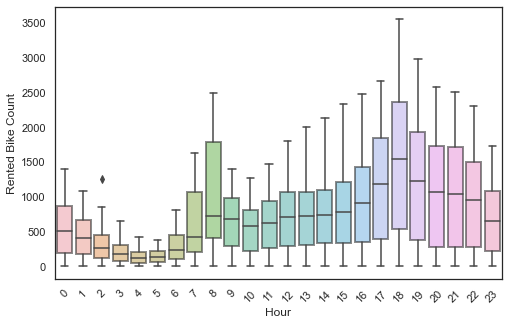

In [10]:
plt.figure(figsize = (8, 5))
ax = sns.boxplot(x='Hour', y='Rented Bike Count', data=sbdata)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

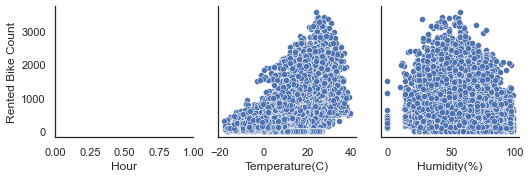

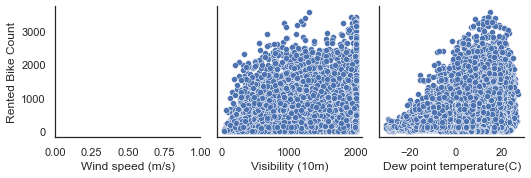

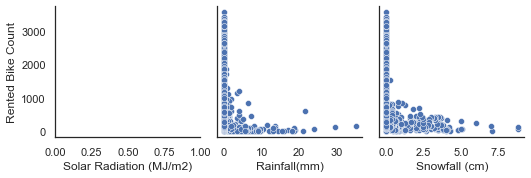

In [11]:
for s in range(2, 10, 3):
    sns.pairplot(data=sbdata,
                x_vars=sbdata.columns[s:s+3],
                y_vars=['Rented Bike Count'])

#temperature: people bike nire in warmer temperatures (positive correlation)
#Humidiy: people seem to bike around 50% humidity (not much correlation)
#wind speeds: people bike less at higher wind speeds and more at moderate speeds rather than no sped (very little correlation)
#visibility: people bike more with more visibility (positive correlation)
#dew point: higher dew points have higher bike rentals (note: dew points related to ambient temperature, so potive correlation)
#solar radiation: less radiation means more bike rentals (negative correlation)
#rainfall/snowfall: more bike rentals when there is no rainfall/snowfall (negative correlation)

#It would seem that when there is a functional day, the biggest factors are: Temperature, visibility, dew points, 
#solar radiation,ranifall, and snowfall. Holidays and seasons are minor factors other than winter season when it is cold,
#less people bike in the winter/cold.

#it would seem most people bike under ideal conditions of warm weather, vsibility, clear of rain or snow 
#on a day that probably isn't a holiday.

In [12]:
#including zeros

sbdata_corr = sbdata.corr()['Rented Bike Count'][2:-1] # -1 because the latest row is SalePrice
sbdata_corr

Temperature(C)              0.538558
Humidity(%)                -0.199780
Wind speed (m/s)            0.121108
Visibility (10m)            0.199280
Dew point temperature(C)    0.379788
Solar Radiation (MJ/m2)     0.261837
Rainfall(mm)               -0.123074
Name: Rented Bike Count, dtype: float64

In [13]:
import operator

individual_features_df = []
for i in range(2, len(sbdata.columns)):
    tmpDf = sbdata[[sbdata.columns[i], 'Rented Bike Count']]
    tmpDf = tmpDf[tmpDf[sbdata.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['Rented Bike Count'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

    Humidity(%): -0.20407346117136227
   Rainfall(mm): -0.1467493819759163
  Snowfall (cm): -0.08951280906518089
Solar Radiation (MJ/m2): 0.08412491780654416
Wind speed (m/s): 0.11711588469139475
Visibility (10m): 0.19928029673135303
Dew point temperature(C): 0.3817510297236579
           Hour: 0.42125508607218737
 Temperature(C): 0.5380977340753976
        Seasons:             1.0
        Holiday:             1.0
Functioning Day:             1.0


## Please build a linear regression model to predict rented bike count by choosing appropriate independentvariables

In [14]:
def trans_seasons(x):#convert seasons to numbers
    if x== 'Winter':
        return 1
    if x== 'Spring':
        return 2
    if x== 'Summer':
        return 3
    if x== 'Autumn':
        return 4

In [15]:
sbdata1=sbdata
sbdata1['Seasons']=sbdata1['Seasons'].apply(trans_seasons)
sbdata1.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,No Holiday,Yes


In [16]:
def trans_Holiday(x): #turn holidays to numbers
    if x== 'Holiday':
        return 1
    if x== 'No Holiday':
        return 0

In [17]:
sbdata2=sbdata1
sbdata2['Holiday']=sbdata2['Holiday'].apply(trans_Holiday)
sbdata2.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,Yes


In [18]:
def trans_Functional_Day(x):#turn functional days to numbers
    if x== 'No':
        return 0
    if x== 'Yes':
        return 1

In [19]:
sbdata3=sbdata2
sbdata3['Functioning Day']=sbdata3['Functioning Day'].apply(trans_Functional_Day)
sbdata3.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1


In [39]:
sbdata3.shape

(8760, 14)

In [20]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(sbdata3, test_size=0.25)

In [21]:
train_x = train.drop(['Rented Bike Count'], axis = 1)
train_x = train.drop(['Date'], axis = 1)
train_y = train['Rented Bike Count']             # output of the training data

val_x = val.drop(['Rented Bike Count'], axis = 1)
val_x = val.drop(['Date'], axis = 1)
val_y = val['Rented Bike Count']

In [41]:
train_x.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [22]:

print('Dimension of train_x dataframe:',train_x.shape)
print('Dimension of train_y dataframe:',train_y.shape)
print('Dimension of val_x dataframe:',val_x.shape)
print('Dimension of val_y dataframe:',val_y.shape)

Dimension of train_x dataframe: (6570, 13)
Dimension of train_y dataframe: (6570,)
Dimension of val_x dataframe: (2190, 13)
Dimension of val_y dataframe: (2190,)


In [23]:
from sklearn.linear_model import LinearRegression

ln_reg = LinearRegression()
ln_reg.fit(train_x, train_y)

LinearRegression()

In [24]:
#these are the coefficients of the calculated regression, they don't matter as much the numbers 
#are so small per every additional bike rented. Bike rentals wold have to scaled at higher orders 
#of magnitudes to see a difference.
ln_reg.coef_

array([ 1.00000000e+00, -1.31689150e-15, -1.67944654e-14, -5.04581725e-15,
        1.08219712e-15,  1.99008125e-16,  1.84400876e-14,  1.05881589e-14,
       -2.29523015e-15, -1.03434975e-15,  9.20122663e-16, -9.40065495e-17,
       -5.02375981e-14])

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

df_pred = ln_reg.predict(val_x)
print('Mean Absolute Error of linear regression:',mean_absolute_error(df_pred, val_y))
print('Mean Square Error of linear regression:', mean_squared_error(df_pred, val_y))
print('R_Squared Score of linear regression:', r2_score(df_pred, val_y))

Mean Absolute Error of linear regression: 1.807283706047584e-13
Mean Square Error of linear regression: 5.633155215223513e-26
R_Squared Score of linear regression: 1.0


In [26]:
sbdata4= sbdata3.drop(['Date'], axis=1)
sbdata4.head()

,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,1,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,1,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,1,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,1,0,1


In [37]:
sbdata4.shape

(8760, 13)

In [27]:
#final prediction on test data
predic_test = ln_reg.predict(sbdata4)

#Create Sample Submission file 
submission_data = pd.DataFrame({'Pred_BikeRental':predic_test})
submission_data
val_y = pd.DataFrame(val_y)
val_y['Predicted'] = submission_data['Pred_BikeRental']

val_y.head()

,Rented Bike Count,Predicted
8254,0,-3.676232e-13
6486,581,5.810000e+02
2345,757,7.570000e+02
3726,247,2.470000e+02
8658,1708,1.708000e+03


In [28]:
print(val_y['Predicted'].shape)
print(val['Rented Bike Count'].shape)

(2190,)
(2190,)


Text(0, 0.5, 'Predicted Y')

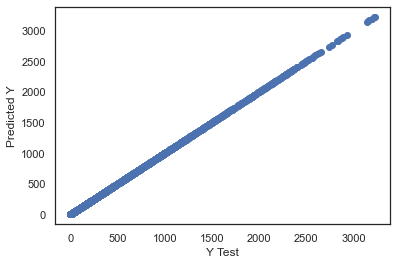

In [29]:
plt.scatter(val['Rented Bike Count'],val_y['Predicted'])
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Ridge

In [30]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge

Ridge()

In [31]:
ridge.fit(train_x,train_y)
ridge_score = ridge.score(val_x,val_y['Rented Bike Count'])
coeff_used = np.sum(ridge.coef_ != 0)
ridge.coef_

array([ 9.99999999e-01,  2.21223836e-08,  1.92613101e-08, -6.77924358e-09,
        1.70826442e-08, -3.12303637e-12,  1.77617205e-09, -5.68291098e-08,
       -4.79459464e-08,  9.12621762e-09,  8.86508232e-08, -1.03189501e-07,
        7.20176395e-07])

In [32]:
print("training score",ridge_score)
print("number of feature used:",coeff_used)

training score 1.0
number of feature used: 13


## Lasso

In [33]:
from sklearn.linear_model import Lasso 
lasso = Lasso()
lasso

Lasso()

In [34]:
lasso.fit(train_x,train_y)
lasso_score = lasso.score(val_x,val_y['Rented Bike Count'])
coeff_used = np.sum(lasso.coef_ != 0)
lasso.coef_

array([ 0.99999757,  0.        ,  0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ])

In [35]:
print("training score",lasso_score)
print("number of feature used:",coeff_used)

training score 0.9999999999940729
number of feature used: 1


## Coment on Model performance by using approapriate diagnostics and measures.

It would seem that with so many factors involved, it makes the data easier to predict.
Althought the data seems to be perfect, its questionable to say that it will work for future 
times if it so happened if new independednt variables arise. This might fall under overfitting
the data or maybe we just have so much data with so many variables that it's easier to predict.